<a href="https://colab.research.google.com/github/justina-tran/employee-attrition/blob/main/PeopleAnalyticsEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Women Who Code: Data Science Mentorship Project
October - November 2022

Dataset to use: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition



Business Questions to Answer:

- **How well could a People Analytics group predict which employees an org will lose through attrition?**

- **Which factors are closely correlated with employees leaving the org?**

####Definition -

Employee attrition analytics is specifically focused on identifying why employees voluntarily leave, what might have prevented them from leaving, and how we can use data to predict attrition risk. Most importantly, this type of employee predictive analytics can be used to help organizations understand and design the interventions that will be most effective in reducing unwanted attrition.

# Analysis Summary

If you're wondering why do employees tend to leave organizations, you'll mostly get answers related to "low paycheck", but is that really the case?

By using a dataset created by IBM data scientists, you'll understand the real reasons of why employees leave the org! Using a heatmap I extracted the attributes that are closely correlated together with the attrition rate and visualized them to get clearly defined trends & insights. The data consists of nearly 1,500 current and former employees with information related to their monthly income, work life balance, experience, job role etc.

###Results

- The Employee Attrition data is derived from a survery ( unknown company/ies )
- No missing values nor duplicates (clean dataset) - how is that possible?
- Total number of employees is 1407
- Most of the employees are male - unbalanced data
- Average of employees are of the age 36
- Average monthly income of the company is 6503
- Average years of employees working at the company is 11 years
- Average years of employees working in the same role is 4 years
- Most employees work as Sales Executives, Research Scientists and Laboratory Technicians
- Most of the employees work at the Research & Development department
- Most employees who attrite are in age range between 25-35 while most employees > 35 years stay
- Employees working 0-10 years have a higher attrition rate than employees working > 10 years
- The count of employees resigning at their first years is higher than when the relative time spend with a manager is very high, people are satisfied with their work. Therefore the chances of an employee resigning is significantly low.







# Recommendations

Based on the analysis, we've seen that most of the employees leaving the company are of young ages, live far away and little experience.

I recommend reaching out to the employees from the groups who usually leave the company from their own will and ask for their feedback, that may help in knowing the reason for future improvements. 
For the current period, you can hire more older people as they are more likely to stay, as well as give promotion to the employees who worked more than 10 years at the company, as a way to motivate younger employees to stay at the company!  Hiring more female employees would be great for a diverse and balanced work life, as well as they're more likely to stay at the company, according to visualizations!

Employees working with the same manager for years also proved that they are more satisfied with their work than employees having to switch managers every couple of years, so take that into consideration! Finally, regarding transportation and employees who usually commute to reach work, visualizations proved that employees who live far from the company have a higher chance in leaving than who live closer. So I suggest turning their worklife into online work, since that might be a bit more easier for them!


# Next steps

1. Work on the imbalancement issue to get better predictions + analysis
2. Feed the data into a Deep Neural Network to predict the attrition rate of employees in a company, which can help HR leaders find the root cause of the problem and predict when employees will leave and why easily.

##EDA


1. Getting to know the data:
 - its attributes
 - its datatypes
 - if there are any missing values/duplicates
 - plot the heatmap to understand the correlation between the different attributes 
 - plot visualizations that accurately visualize the data ( based on heatmap ) and their correlations

In [60]:
import pandas as pd
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [62]:
Dataset = pd.read_csv('/content/drive/MyDrive/HR Employee Attrition.csv')
Dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [63]:
Dataset.shape

(1470, 35)

In [64]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [65]:
Dataset.duplicated().sum()

0

In [66]:
# Check the numerical attributes
Dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 - Average of employees are of the age 36 
 - Average monthly income of the company is 6503
 - Average years of employees working at the company is 11 years
 - Average years of employees working in the same role is 4 years

In [67]:
Dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

  - The Employee Attrition dataset consists of 1470 rows/employees and 35 different columns
  - The data is derived from a survery ( unknown company/ies )
  - No missing values nor duplicates (clean dataset) - how is that possible?
  - Some attributes isnt really necessary to include (employee count, employee number, over18, standard hours) - drop them
  - Satisfaction columns (EnvironmentSatisfaction, RelationshipSatisfaction, JobSatisfaction) will let us determine what exactly influences the satisfaction or lack of it among the employee (they're set into 5 values with different ranks). 

In [68]:
Dataset["Age"].unique() # making sure the age ranges are appropriate and not wrongly inputted

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [69]:
Dataset = Dataset.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [70]:
Dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [71]:
Dataset['Gender'].value_counts() #Most of the employees are male

Male      882
Female    588
Name: Gender, dtype: int64

In [72]:
Dataset["Attrition"].value_counts() #imbalanced - how can we visualize accurately when thats the case?
#plus, if we're answering the question thats related to which employees exactly will leave, we need a higher rate for the 'Yes' feature

No     1233
Yes     237
Name: Attrition, dtype: int64

In [73]:
Dataset['JobLevel'].value_counts() # Its not obvious what those numbers refer to? So its useless to visualize - lets try dropping it

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

Since we want to find which factors exactly are closely correlated with eachother :
1. Cross plots can help us determine that.
2. Heat maps can help us find out which 2 features are related

  - Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

- A heatmap to help in seeing the high correlations between each attribute and the other, so we can be able to visualize them and determine which factors are correlated with the employees leaving the organization.

In [74]:
convert = {'Yes': 1, 'No': 0}
Dataset['AttritionNum'] = Dataset.Attrition.apply(lambda x: convert[x])

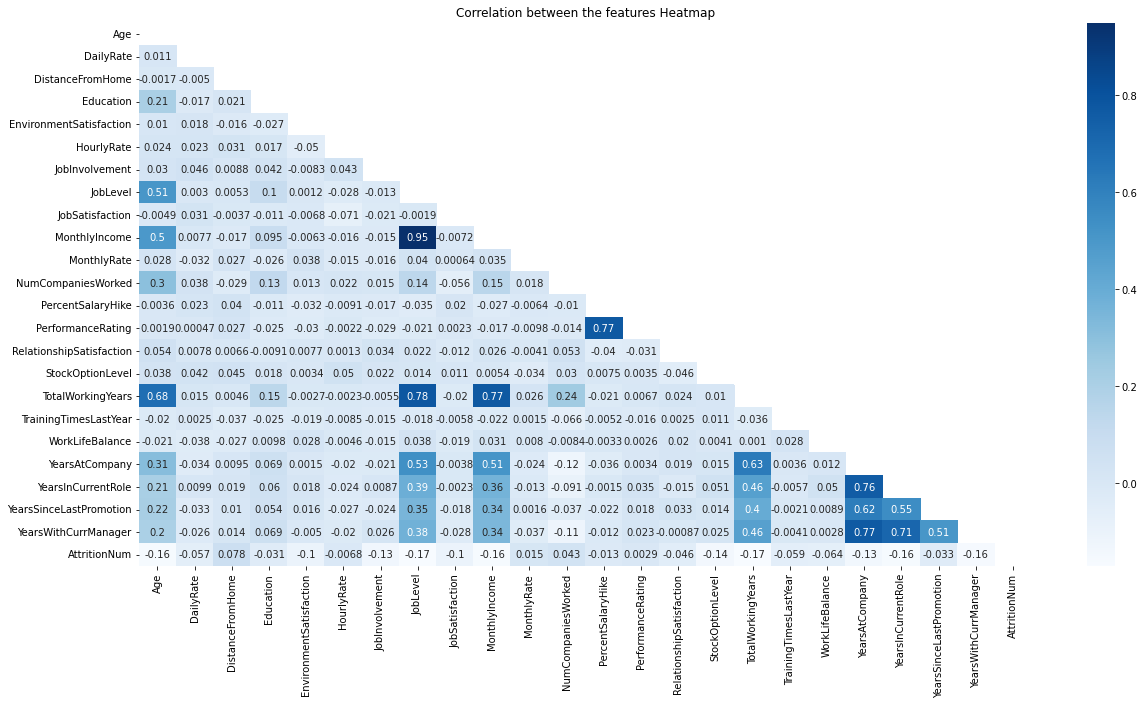

In [75]:
plt.figure(figsize=(20, 10))
mask = np.triu((Dataset.corr())) # returns the triangle upper array of the heatmap
heatmap = sns.heatmap(Dataset.corr(), mask=mask, annot=True, cmap='Blues') #chose this color so you can see the differences clearly
heatmap.set_title('Correlation between the features Heatmap');

In [76]:
Dataset['JobLevel'].value_counts() # Its not obvious what those numbers refer to? So its useless to visualize - lets try dropping it

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [77]:
Dataset = Dataset.drop(['JobLevel'],axis=1) #had a 0.9 correlation between the joblevel and monthlyincome

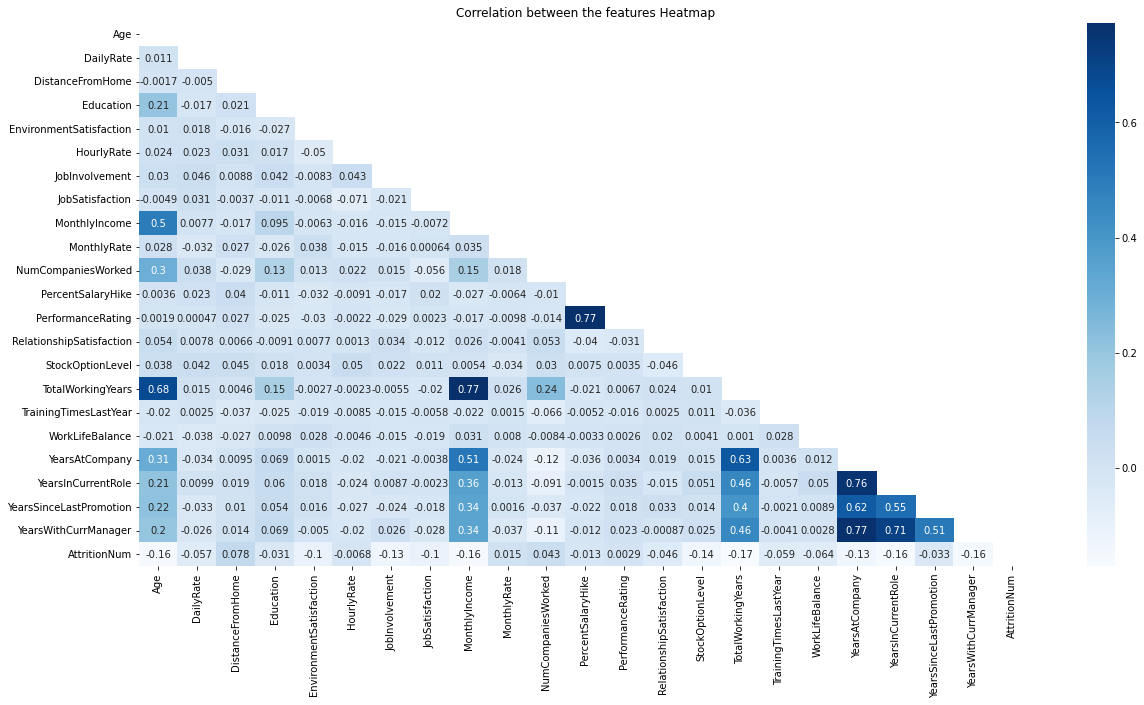

In [78]:
plt.figure(figsize=(20, 10))
mask = np.triu((Dataset.corr()))
heatmap = sns.heatmap(Dataset.corr(), mask=mask, annot=True, cmap='Blues') 
heatmap.set_title('Correlation between the features Heatmap');

Based on the heatmap, we can find a high correlation between the Monthly Income and the Total Working Years (the more you work in the company = the more is your income)

There's also a relationship between the Percent salary and the Perfomance rating, so that may be because employees in the company determine their ratings based on the salary they get!

YearsInCurrentRole, YearsWithCurrManager and YearsAtCompany are also attributes that are highly correlated together

##Visualizations

Since we're focusing on getting which employees will the organizations lose based on the attrition, we'll have to look into the 'Yes' part of the closely correlated attributes


In [79]:
fig = px.histogram(Dataset, x="JobRole", height= 500, text_auto='.2s', color = 'Department', color_discrete_sequence=px.colors.qualitative.Set2,
                   title = 'Count distributions of the Job Roles and Departments')
fig.show() #most employees work as sales executives, research scientists and lab technicians
 # most of the employees work at the Research & Development department

In [80]:
fig = px.histogram(Dataset, x="TotalWorkingYears", y= 'MonthlyIncome',nbins=20, histfunc='avg',
                   title = 'Total Working Years VS Monthly Income')
fig.show() # the more you work in the company = the more your income is higher

## Conclusion
- The Employee Attrition data is derived from a survery ( unknown company/ies )
- No missing values nor duplicates (clean dataset) - how is that possible?
- Total number of employees is 1407
- Most of the employees are male
- Average of employees are of the age 36
- Average monthly income of the company is 6503
- Average years of employees working at the company is 11 years
- Average years of employees working in the same role is 4 years

Based on the heatmap, we can find a high correlation between the Monthly Income and the Total Working Years (the more you work in the company = the more is your income) - proved by visualizing

YearsInCurrentRole, YearsWithCurrManager and YearsAtCompany are also attributes that are highly correlated together

PercentSalaryHike and Perfomance Ratings had a high correlation too, according to the graph, it showed that employees who get an outstanding perfomance = recieve a higher salary hike than employees getting Excellent perfomance

  - most employees work as Sales Executives, Research Scientists and Laboratory Technicians
  - most of the employees work at the Research & Development department


## Based on Attrition
- Most employees who attrite are in age range between 25-35 while most employees > 35 years stay
- Employees working 0-10 years have a higher attrition rate than employees working > 10 years

In [81]:
fig = px.histogram(Dataset, x="Gender", height= 500, text_auto='.2s', color = 'Attrition', color_discrete_sequence=px.colors.qualitative.Set2,
                   title = 'Count distribution of the gender vs attrition')
fig.show() #Males are more likely to leave the company = hire more females

In [82]:
fig = px.histogram(Dataset, x="Age",nbins=20, color='Attrition',
title ="A distribution of employees' age range based on the attrition")
fig.show() # Most employees who attrite are in age range between 25-35 while most employees > 35 years stay

In [83]:
fig = px.histogram(Dataset, x="TotalWorkingYears",nbins=20, color='Attrition', 
title ="A distribution of employees' total working years based on the attrition")
fig.show() # Employees working 5-10 years have a higher attrition rate than employees working > 10 years - why?

The performance ratings slightly decreases with the chances of people leaving the organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

In [84]:
sats_att=Dataset.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Count of the job satisfaction level in an organization')

Employees who started their career with the company have a higher chance of leaving the organization to a different company while people who have gained experience working in multiple companies stay.

In [85]:
ncwrd_att=Dataset.groupby(['TotalWorkingYears','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='TotalWorkingYears',y='Counts',color='Attrition',title='Count of working experience vs attrition')

The count of employees resigning at their first years is higher than when the relative time spend with a manager is very high, people are satisfied with their work. Therefore the chances of an employee resigning is significantly low. 


In [86]:
man_att=Dataset.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of spent years in a company with a manager vs attrition')

In [87]:
fig = px.histogram(Dataset, x="DistanceFromHome",nbins=20, color='Attrition', 
title ="A distribution of employees' distance from home vs the attrition")
fig.show()